In [1]:
%run ../_preamble.ipynb
from _work.src.modules import AutoEncoder, train_model, plot_metrics, plot_tensor
from _work.src.modules.utils import save_metrics, load_metrics
from _work.src.data import small_dataloader as dataloader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

In [15]:
model = AutoEncoder(sizes=[dataloader.dataset.NUM_ATTRIBUTES, 32], batch_norm=False, dropout=0)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
loss_fn = torch.nn.MSELoss(reduction="sum")

metrics = train_model(
    model,
    optimizer,
    loss_fn,
    dataloader,
    epochs=400,
)

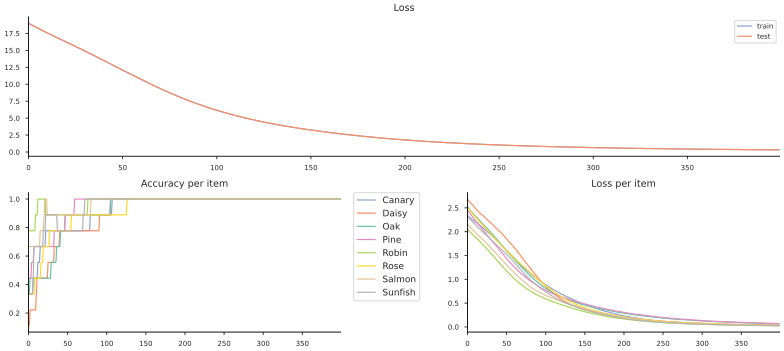

In [16]:
plot_metrics(metrics);

In [27]:
from sklearn.decomposition import PCA

n_components = 3
data_df = dataloader.dataset.df

axes = ["x", "y", "z"][:n_components]

pca = PCA(n_components=n_components, random_state=0)
fit = pca.fit_transform(data_df)
fit_df = pd.DataFrame(data=fit, columns=axes, index=data_df.index)

predictions = metrics[0].predictions

pca_df = pd.DataFrame()
for epoch in predictions['epoch'].unique():
    df = predictions[predictions["epoch"] == epoch][data_df.columns]
    out = pca.transform(df)
    out_df = pd.DataFrame(data=out, columns=axes, index=df.index)
    out_df["epoch"] = [epoch] * len(out)
    pca_df = pd.concat([pca_df, out_df])

In [ ]:
with plt.style.context({ 'axes.xmargin': 0.05 }):
    palette = {
        'Oak': '#B0E65A',
        'Pine': '#75993C',
        'Daisy': '#FEB756',
        'Rose': '#E6634E',
        'Salmon': '#9194E3',
        'Sunfish': '#8BCBD9',
        'Canary': '#FFD92F',
        'Robin': '#FF8C9A',
    }
    plt.scatter(pca_df['x'], pca_df['y'], c=pca_df['epoch'], s=20, cmap='crest')
    plt.scatter(fit_df['x'], fit_df['y'], c=[palette[x] for x in fit_df.index], s=100, marker="*", edgecolors="black")

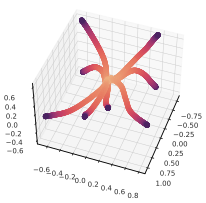

In [139]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2, 1, height_ratios=[0.05, 1], hspace=0.1)
ax = fig.add_subplot(gs[1], projection='3d')
ax.view_init(45, 20)

# ax.scatter(pca_df['x'], pca_df['y'], pca_df['z'], marker='o', c='r', depthshade=True);
# plt.savefig('wot');
# ax.scatter(*np.random.randn(3, 50))
step = 1
for item in dataloader.dataset.df.index:
    df = pca_df[pca_df.index == item]
    ax.scatter(
        df["x"][::step],
        df["y"][::step],
        df["z"][::step],
        c=df["epoch"][::step],
        cmap="flare",
        alpha=0.7
    )